# Comparing H264 using 8 and 10 bits

In [7]:
sequence = "bus"

In [2]:
!../sequences/$sequence/runme.sh

bus_cif.y4m exists.
ffmpeg version n4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 10.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 --enable-libxvid --enable-nvdec --

## 8 bpp

In [1]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [2]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [3]:
!sed -z -i 's!self.E_codec5!self.E_codec4!g' image_IPP.py

In [5]:
!cat -n image_IPP.py | grep "self.E_codec" 

    78	                dequantized_E_k = self.E_codec4(E_k, f"{video}texture_", k, q_step) # (g and h)


In [6]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.3030916806958474 KBPS: 2765.36 Average AMSE: 66.85563304485831
     2	Q_step: 24 BPP: 0.22402935606060606 KBPS: 2044.008 Average AMSE: 108.56639068637763
     3	Q_step: 27 BPP: 0.16518045033670034 KBPS: 1507.08 Average AMSE: 170.7159631251753
     4	Q_step: 30 BPP: 0.12298944304152638 KBPS: 1122.136 Average AMSE: 258.73178902742706
     5	Q_step: 33 BPP: 0.09367283950617285 KBPS: 854.656 Average AMSE: 376.75967016080955
     6	Q_step: 36 BPP: 0.07480534511784512 KBPS: 682.5120000000001 Average AMSE: 524.6659754007085
     7	Q_step: 39 BPP: 0.06352500701459035 KBPS: 579.592 Average AMSE: 698.6472671594416


In [8]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/8bpp.txt

In [9]:
!cat /tmp/8bpp.txt

0.3030916806958474	66.85563304485831
0.22402935606060606	108.56639068637763
0.16518045033670034	170.7159631251753
0.12298944304152638	258.73178902742706
0.09367283950617285	376.75967016080955
0.07480534511784512	524.6659754007085
0.06352500701459035	698.6472671594416


In [10]:
RD_8bpp = []
with open("/tmp/8bpp.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_8bpp.append((float(rate), float(_distortion)))

## 16 bpp

In [11]:
!sed -z -i 's/\nimport image_IPP as codec/\n#import image_IPP as codec/g' RD_curve.py
!sed -z -i 's/\n#import image_IPP_adaptive as codec\n/\nimport image_IPP_adaptive as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport MP4 as codec\n/\n#import MP4 as codec\n/g' RD_curve.py
!sed -z -i 's/\nimport IPP_compressor as codec\n/\n#import IPP_compressor as codec\n/g' RD_curve.py

!sed -z -i 's!\ntransform = "DWT"\n!\n#transform = "DWT"\n!g' config.py
!sed -z -i 's!\ntransform = "LT"\n!\n#transform = "LT"\n!g' config.py
!sed -z -i 's!\n#transform = None\n!\ntransform = None\n!g' config.py

In [12]:
!cat -n RD_curve.py | grep "import"
!cat -n config.py | grep "transform"

     5	import config
     6	import distortion
     7	import frame
    10	#import image_interpolated_IPP as codec
    11	#import image_IPP as codec
    12	import image_IPP_adaptive as codec
    13	#import MP4 as codec
    14	#import IPP_compressor as codec
     3	#transform = "DWT"
     4	#transform = "LP"
     5	transform = None


In [13]:
!sed -z -i 's!self.E_codec4!self.E_codec5!g' image_IPP.py

In [14]:
!cat -n image_IPP.py | grep "self.E_codec" 

    78	                dequantized_E_k = self.E_codec5(E_k, f"{video}texture_", k, q_step) # (g and h)


In [15]:
!python RD_curve.py 1> >(tee /tmp/output >&1) | grep BPP | grep Average | cat -n

     1	Q_step: 21 BPP: 0.3235795454545454 KBPS: 2952.288 Average AMSE: 72.41956840540824
     2	Q_step: 24 BPP: 0.24138608305274972 KBPS: 2202.368 Average AMSE: 113.92355806327164
     3	Q_step: 27 BPP: 0.17730780022446688 KBPS: 1617.728 Average AMSE: 175.81145526445007
     4	Q_step: 30 BPP: 0.13093258978675645 KBPS: 1194.608 Average AMSE: 262.57742759627524
     5	Q_step: 33 BPP: 0.09786054994388327 KBPS: 892.864 Average AMSE: 380.4232937008979
     6	Q_step: 36 BPP: 0.07596187570145903 KBPS: 693.064 Average AMSE: 532.7874720512416
     7	Q_step: 39 BPP: 0.06408792789001122 KBPS: 584.728 Average AMSE: 699.3235489662246


In [16]:
!grep BPP /tmp/output | grep Average | cut -d ' ' -f 4,9 | tr ' ' '\t'  > /tmp/16bpp.txt

In [17]:
!cat /tmp/16bpp.txt

0.3235795454545454	72.41956840540824
0.24138608305274972	113.92355806327164
0.17730780022446688	175.81145526445007
0.13093258978675645	262.57742759627524
0.09786054994388327	380.4232937008979
0.07596187570145903	532.7874720512416
0.06408792789001122	699.3235489662246


In [18]:
RD_16bpp = []
with open("/tmp/16bpp.txt", 'r') as f:
    for line in f:
        rate, _distortion = line.split('\t')
        RD_16bpp.append((float(rate), float(_distortion)))

## Comparison

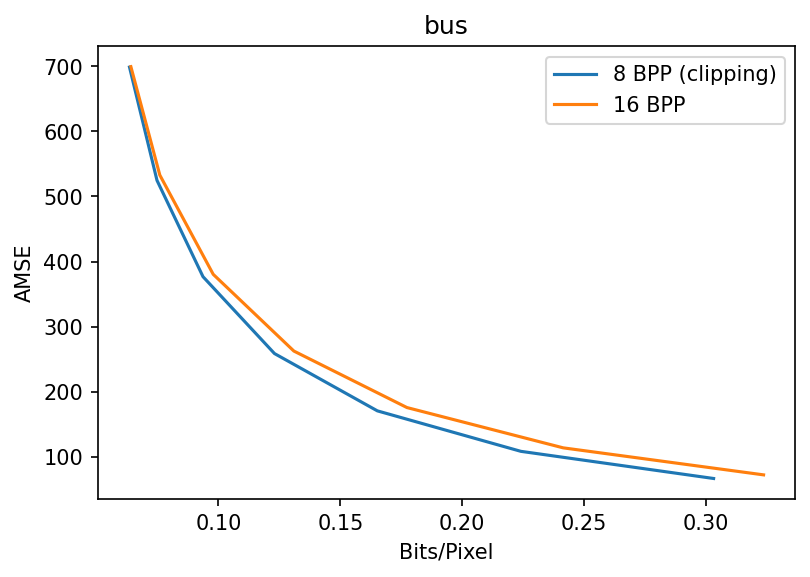

In [19]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pylab

pylab.figure(dpi=150)
pylab.plot(*zip(*RD_8bpp), label="8 BPP (clipping)")
pylab.plot(*zip(*RD_16bpp), label="16 BPP")
pylab.title(f"{sequence}")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("AMSE")
plt.legend(loc='upper right')
pylab.show()